In [1]:
import requests
import pandas as pd

In [2]:
start='2022-03-02'
to='2022-04-01'
myurl='https://transparency.entsog.eu/api/v1/aggregateddata.xlsx?forceDownload=true&pointDirection=at---------at-dso-0001entrytransmissionde-the-----,at---------at-dso-0001exittransmissionde-the-----,at---------at-tso-0001entrytransmissionde-the-----,at---------at-tso-0001entrytransmissionhu---------,at---------at-tso-0001entrytransmissionsi---------,at---------at-tso-0001entrytransmissionsk---------,at---------at-tso-0001exittransmissionde-the-----,at---------at-tso-0001exittransmissionhu---------,at---------at-tso-0001exittransmissionsi---------,at---------at-tso-0001exittransmissionsk---------,at---------at-tso-0003entrytransmissionit---------,at---------at-tso-0003entrytransmissionsk---------,at---------at-tso-0003exittransmissionit---------,at---------at-tso-0003exittransmissionsk---------,at---------at-tso-0004entrytransmissionde-the-----,at---------at-tso-0008entrytransmissionde-the-----&from={}&to={}&indicator=Physical%20Flow&periodType=day&timezone=CET&limit=-1'.format(start,to)
response=requests.get(myurl)
print(response)

<Response [200]>


In [3]:
df=pd.read_excel(myurl)
print(df)

                                                    id  dataSet dataSetLabel  \
0    1AggregatesATAT---------AT-TSO-0001entryTransm...        1   Aggregates   
1    1AggregatesATAT---------AT-TSO-0001entryTransm...        1   Aggregates   
2    1AggregatesATAT---------AT-TSO-0001exitTransmi...        1   Aggregates   
3    1AggregatesATAT---------AT-TSO-0001exitTransmi...        1   Aggregates   
4    1AggregatesATAT---------AT-TSO-0001exitTransmi...        1   Aggregates   
..                                                 ...      ...          ...   
305  1AggregatesATAT---------AT-TSO-0001exitTransmi...        1   Aggregates   
306  1AggregatesATAT---------AT-TSO-0003entryTransm...        1   Aggregates   
307  1AggregatesATAT---------AT-TSO-0003entryTransm...        1   Aggregates   
308  1AggregatesATAT---------AT-TSO-0003exitTransmi...        1   Aggregates   
309  1AggregatesATAT---------AT-TSO-0003exitTransmi...        1   Aggregates   

         indicator periodType        pe

In [4]:
df_subset=df[['directionKey','day','value']]
print(df_subset)

    directionKey  day      value
0          entry    2          0
1          entry    2  110640481
2           exit    2    4548266
3           exit    2  110458056
4           exit    2   42757724
..           ...  ...        ...
305         exit    1          0
306        entry    1          0
307        entry    1  805393975
308         exit    1  807510357
309         exit    1          0

[310 rows x 3 columns]


In [5]:
values_by_entry=df_subset.pivot_table(index=['day','directionKey'])
print(values_by_entry)

                         value
day directionKey              
1   entry         3.199356e+08
    exit          1.633728e+08
2   entry         2.736328e+08
    exit          1.720251e+08
3   entry         2.877602e+08
...                        ...
29  exit          1.169830e+08
30  entry         3.075309e+08
    exit          1.269135e+08
31  entry         3.124569e+08
    exit          1.274440e+08

[62 rows x 1 columns]


<AxesSubplot:xlabel='day,directionKey'>

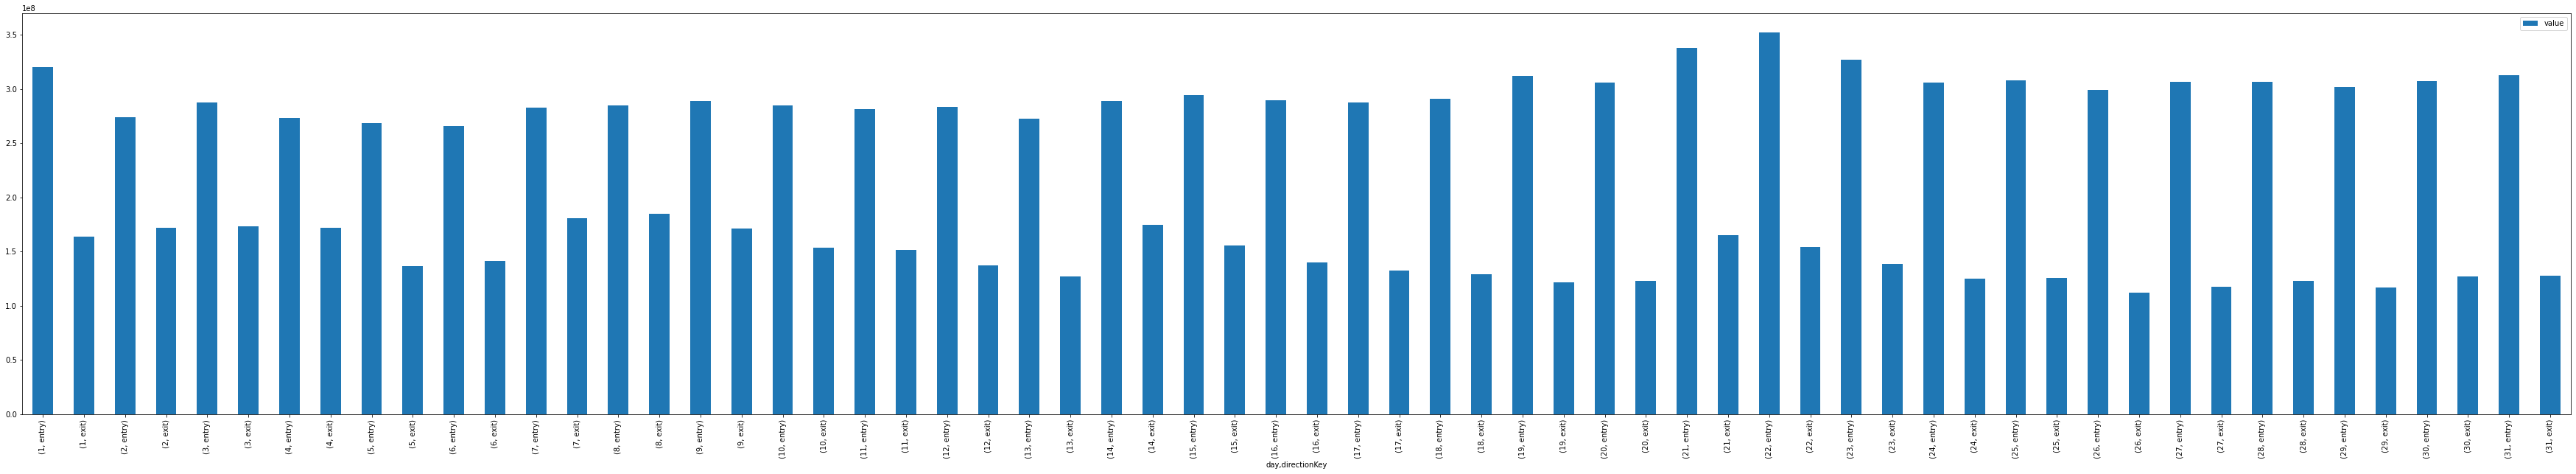

In [6]:
values_by_entry.plot(kind='bar',figsize=(62,10))